In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
jury = {"Ethnicity":["Asian", "Black", "Latino", "White", "Other"], "Eligible":[0.15, 0.18, 0.12, 0.54, 0.01], "Panels":[0.26, 0.08, 0.08, 0.54, 0.04]}
jury

{'Ethnicity': ['Asian', 'Black', 'Latino', 'White', 'Other'],
 'Eligible': [0.15, 0.18, 0.12, 0.54, 0.01],
 'Panels': [0.26, 0.08, 0.08, 0.54, 0.04]}

In [3]:
Alameda_df = pd.DataFrame(jury)
Alameda_df

,Ethnicity,Eligible,Panels
0,Asian,0.15,0.26
1,Black,0.18,0.08
2,Latino,0.12,0.08
3,White,0.54,0.54
4,Other,0.01,0.04


In [4]:
Alameda_df = Alameda_df.set_index("Ethnicity")
Alameda_df

,Eligible,Panels
Ethnicity,,
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


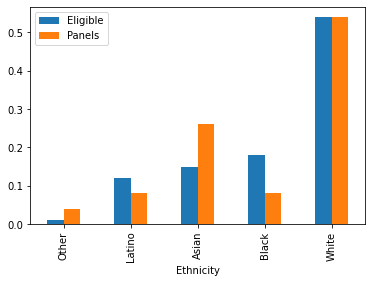

In [5]:
Alameda_df.sort_values("Eligible").plot.bar()
plt.show()

In [6]:
Alameda_df['jury_diff'] = Alameda_df['Eligible'] - Alameda_df['Panels']
Alameda_df

,Eligible,Panels,jury_diff
Ethnicity,,,
Asian,0.15,0.26,-0.11
Black,0.18,0.08,0.10
Latino,0.12,0.08,0.04
White,0.54,0.54,0.00
Other,0.01,0.04,-0.03


In [7]:
Alameda_df['Absolute_difference'] = abs(Alameda_df['Eligible'] - Alameda_df['Panels'])
Alameda_df

,Eligible,Panels,jury_diff,Absolute_difference
Ethnicity,,,,
Asian,0.15,0.26,-0.11,0.11
Black,0.18,0.08,0.10,0.10
Latino,0.12,0.08,0.04,0.04
White,0.54,0.54,0.00,0.00
Other,0.01,0.04,-0.03,0.03


In [8]:
test_statistic = Alameda_df['Absolute_difference'].sum()
test_statistic

0.28

In [9]:
def total_variation_distance(distribution_1, distribution_2):
    return np.abs(distribution_1 - distribution_2).sum()/2

In [10]:
original= np.abs(Alameda_df['Eligible'] - Alameda_df['Panels']).sum()
original

0.28

Random Sampling

In [11]:
Alameda_df_1 = pd.DataFrame(Alameda_df, columns = ['Eligible','Panels'])

In [12]:
Alameda_df_1['Random Sample'] = np.random.multinomial(1453, [0.15, 0.18, 0.12, 0.54, 0.01])/1453
Alameda_df_1

,Eligible,Panels,Random Sample
Ethnicity,,,
Asian,0.15,0.26,0.155540
Black,0.18,0.08,0.182381
Latino,0.12,0.08,0.112182
White,0.54,0.54,0.539573
Other,0.01,0.04,0.010323


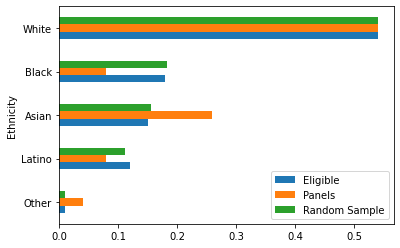

In [13]:
Alameda_df_1.sort_values("Eligible").plot.barh()
plt.show()

In [14]:
TVD = (abs(Alameda_df_1['Eligible'] - Alameda_df_1['Random Sample'])).sum()/2
TVD

0.008245010323468742

In [15]:
simulations = 5000
panel_size = 1453
tvd=[]
for i in np.arange(simulations):
    Alameda_df_1["Random Sample"] = (np.random.multinomial(1453, [0.15, 0.18, 0.12, 0.54, 0.01]))/panel_size
    tvd.append(total_variation_distance(Alameda_df_1['Eligible'], Alameda_df_1['Random Sample']))

In [16]:
tvd_df = pd.DataFrame(tvd)
tvd_df.rename(columns={0:"TVD"}, inplace=True)
tvd_df.head()

,TVD
0,0.015760
1,0.007357
2,0.012354
3,0.023297
4,0.015760


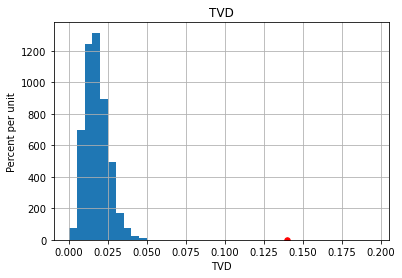

In [17]:
tvd_df.hist(bins = np.arange(0, 0.2, 0.005))
plt.ylabel('Percent per unit')
plt.xlabel('TVD')
plt.scatter(0.14, 0, color='red', s=30)
plt.show()